# MTH 651: Advanced Numerical Analysis

## Lecture 3

### Topics

* Sobolev spaces
* Weak derivatives
* Sobolev norms

#### Textbook references

Sections 1.1, 1.2, 1.3

This part of the course material is going to be a little abstract.

We are building the theoretical framework that will allow us to rigorously formulate and analyze finite element methods.

#### $L^p$ spaces

We are interested in _Lebesgue measureable functions_.

We will not review the theory of Lebesgue integration in this course.
If you are unfamiliar or need a refresher, check out the real analysis texbooks of Folland or Rudin.

We will mainly consider real-valued functions
$$ f : \Omega \to \mathbb{R} $$
that are Lebesgue integrable.
The **domain** is a Lebesgue-measurable subset of $\mathbb{R}^n$ (typically $n \in \{1, 2, 3\}$).
The notation
$$ \int_\Omega f(x) \, dx $$
denotes the Lebesgue integral of $f$.

> **_DEFINITION:_** The $L^p$ norm of $f$ (for $1 \leq p < \infty$) is defined as
> $$
> \| f \|_{L^p(\Omega)} := \left( \int_\Omega | f(x) |^p \, dx \right)^{1/p}
> $$
> The $L^\infty$ norm of $f$ is defined as
> $$
> \| f \|_{L^\infty(\Omega)} := \operatorname{ess\,sup} \{ |f(x)| : x \in \Omega \}
> $$

> **_DEFINITION:_** The **Lebesgue spaces** $L^p$ for $1 \leq p \leq \infty$ are defined by
> $$
> L^p = \{ f : \| f \|_{L^p(\Omega)} < \infty \}
> $$

We consider _equivalences classes_ of functions, i.e. we identify $f$ and $g$ whenever $\| f - g \|_{L^p(\Omega)} = 0$.
This is equivalent to saying $f = g \quad \text{a.e.}$ (almost everywhere).

There are some useful inequalities in $L^p$ spaces:

**Minkowski's inequality** (triangle inequality in $L^p$)
$$
   \| f + g \|_{L^p(\Omega)} \leq \| f \|_{L^p(\Omega)} + \| g \|_{L^p(\Omega)}
$$

**Hölder's inequality** for $1 \leq p, q \leq \infty$ and $1/p + 1/q = 1$
$$
   \| f g \|_{L^1{\Omega}} \leq \| f \|_{L^p{\Omega}} \| g \|_{L^q{\Omega}}
$$

**Cauchy-Schwarz inequality** (this is Hölder's inequality for $p = q = 2$)
$$
   \int_\Omega | f(x) g(x) | \, dx \leq \| f \|_{L^2{\Omega}} \| g \|_{L^2{\Omega}}
$$

The $L^p$ spaces are **normed vector spaces**. A norm must satisfy the following axioms:

* $\| v \| \geq 0$ and $\| v \| = 0$ iff $v = 0$
* $\| c v \| = |c| \| v \|$ for all $c \in \mathbb{R}$
* $\| v + w \| \leq \| v \| + \| w \|$

Exercise: prove the vector space and norm axioms hold for $L^p(\Omega)$

A norm $\| \cdot \|$ induces a **metric** (measure of "distance") $d(\cdot, \cdot)$ defined by
$$
   d(v, w) = \| v - w \|.
$$
This metric induces a topology.
A vector space $V$ with the topology induced by this metric is called a **normed vector space**.

> **_DEFINITION:_** A sequence $v_k \in V$ is called **Cauchy** if $\| v_i - v_j \| \to 0$ as $i, j \to \infty$.

> **_DEFINITION:_** A space $V$ is **complete** if every Cauchy sequence converges to a limit, that is, if $v_i$ is Cauchy, then there exists some $v \in V$ such that $\| v_i - v \| \to 0$ as $i \to \infty$.

> **_DEFINITION:_** A **Banach space** is a complete normed vector space.

> **_THEOREM:_** For $1 \leq p \leq \infty$, the space $L^p$ is a Banach space.

#### Weak derivatives

We are interested in introducing a more generalized notion of derivatives that will be useful in $L^p$ spaces, where point values are not relevant.
These will be called **weak derivatives**, and will agree with the standard derivatives when the function is sufficiently smooth, but will allow us to define derivatives for less regular functions in a way that is useful and makes dense.

##### Multi-index notation

Let $\alpha = (\alpha_1, \alpha_2, \ldots, \alpha_n)$ be a **multi-index**.

We define $|\alpha| = \sum_{i=1}^n \alpha_i$.

For $\phi \in C^\infty$, we use the notation(s)

$$
   D^\alpha\phi, \quad
   D^\alpha_x\phi, \quad
   \left(\frac{\partial}{\partial x}\right)^\alpha\phi, \quad
   \phi^{(\alpha)}, \quad
   \partial^\alpha_x \phi
$$

to mean the partial derivative

$$
   \left( \frac{\partial}{\partial_{x_1}} \right)^{\alpha_1}
   \left( \frac{\partial}{\partial_{x_1}} \right)^{\alpha_2}
   \cdots
   \left( \frac{\partial}{\partial_{x_1}} \right)^{\alpha_n}
   \phi
$$

The order of derivative is given by $| \alpha |$.

##### Compactly supported functions

The **support** of a function $u$ is the closure of the set of points in the domain for which $u$ is nonzero
$$
   \operatorname{supp} (u) = \operatorname{closure} \{ x : u(x) \neq 0 \}
$$

If $\operatorname{supp} (u)$ is bounded then $u$ has **compact support**.

If $\operatorname{supp} (u)$ is bounded and $\operatorname{supp} (u) \subset \operatorname{interior} (\Omega)$ then $u$ has **compact suport in $\Omega$**.

> **_DEFINITION:_** Let $\Omega \subseteq \mathbb{R}^n$. Let $\mathcal{D}(\Omega)$ or $C^\infty_0(\Omega)$ denote the set of $C^\infty(\Omega)$ functions with compact support in $\Omega$.

First, let's check that the set $\mathcal{D}(\Omega)$ is not empty (i.e. that there exist smooth functions with compact support).

Let
$$
   \phi(x) = \begin{cases}
      \exp\left( \frac{1}{|x|^2 - 1} \right) &\quad |x| < 1 \\
      0 &\quad |x| \geq 1
   \end{cases}
$$

> _PROPOSITION_ : $\phi^{(\alpha)}(x) = P_\alpha \phi(x)/(1 - |x|^2)^{|\alpha|}$ for some polynomial $P_\alpha$.

> _Proof._ 
>
> For $|x| > 1$ it is clear that $\phi^{(\alpha)}(x) = 0$.
>
> Likewise, for $|x| < 1$, directly differentiating and using induction on $\alpha$ shows that
> $$
>    \phi^{(\alpha)}(x) = P_\alpha(x) e^{-t} t^{|\alpha|}, \qquad t = \frac{1}{1-|x|^2}
> $$
>
> Since $\exp$ increases faster than any polynomial, we have that
> $$
>   P_\alpha(x) e^{-t} t^{|\alpha|} \to 0
> $$
> as $t \to \infty$, and so $\phi^{(\alpha)}$ is continuous at $|x| = 1$.
>
> A similar argument shows that $P_\alpha(x) e^{-t} t^{|\alpha|}$ is differentiable at $|x| = 1$ (and has derivative zero).


/tmp/ipykernel_49911/3623603430.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x) < 1, np.exp(1.0 / (x**2 - 1)), 0)


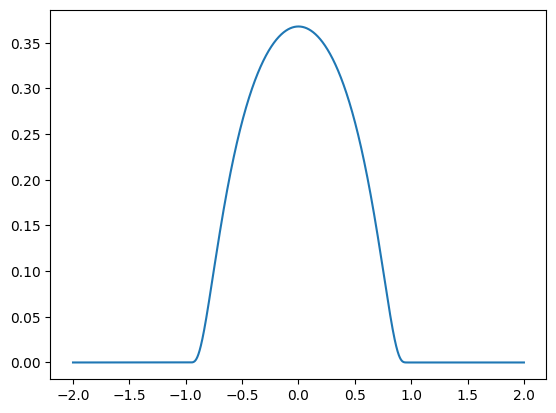

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.where(np.abs(x) < 1, np.exp(1.0 / (x**2 - 1)), 0)

x = np.linspace(-2, 2, 10000)
plt.plot(x, f(x))

/tmp/ipykernel_49911/3623603430.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x) < 1, np.exp(1.0 / (x**2 - 1)), 0)


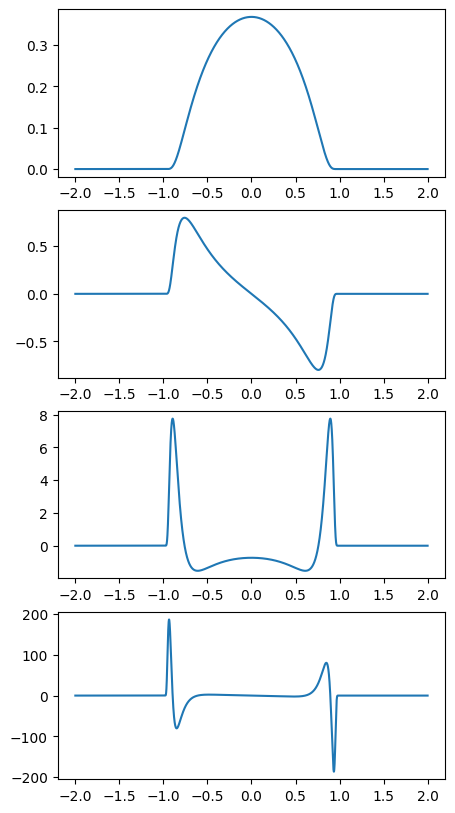

In [2]:
def centered_difference(y, h):
    n = len(x)
    dy = np.zeros(n)
    for i in range(n):
        if i == 0:
            yL = 0.0
        else:
            yL = y[i-1]
        if i == n-1:
            yR = 0.0
        else:
            yR = y[i+1]
        dy[i] = (yR - yL) / (2*h)
    return dy

def nth_centered_difference(n, y, h):
    dy = y
    for i in range(n):
        dy = centered_difference(dy, h)
    return dy

h = x[1] - x[0]
y = f(x)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=(5,10))

ax0.plot(x, y)
ax1.plot(x, nth_centered_difference(1, y, h))
ax2.plot(x, nth_centered_difference(2, y, h))
ax3.plot(x, nth_centered_difference(3, y, h))

> **_DEFINITION:_** Define the set of **locally integrable** functions by
> $$
>  L^1_{loc} = \{ f : f \in L^1(K) \text{ for all compact $K \subset \operatorname{interior} \Omega$} \}
> $$

> **_DEFINITION:_** A function $f \in L^1_{loc}$ has a **weak derivative** $D^\alpha_w f$ if there exists $g \in L^1_{loc}$ such that
> $$
>  \int_\Omega g(x) \phi(x) \, dx = (-1)^{|\alpha|} \int_\Omega f(x) \phi^{({\alpha})}(x) \,dx
> $$
> for all $\phi \in \mathcal{D}(\Omega)$.
>
> If such $g$ exists, define $D^\alpha_w f = g$.

> _EXAMPLE:_ Let $n = $, $\Omega = [-1, 1]$, $f(x) = |x|$.
>
> As we know, $f(x)$ is **not** differentiable at $x = 0$.
>
> But, $D^1_w f$ exists and
> $$
>  D^1_w f = \begin{cases} 1 &\quad x < 0 \\ -1 &\quad x > 0 \end{cases}
> $$
>
> To see this, split the integral into $[-1, 0]$ and $[0, 1]$ and integrate by parts.

> **_PROPOSITION:_** If $f \in C^{|\alpha|}(\Omega)$ then $D^\alpha_w f = D^\alpha f$ (the weak and strong derivatives agree).

How can this be proven?

### Sobolev Norms and Spaces

> **_DEFINITION:_** Let $k \in \mathbb{N}$.
> Let $f \in L^1_{loc}(\Omega)$.
> Suppose that the weak derivatives $D^\alpha_w f$ exist for all $| \alpha | \leq k$.
> Then, the **Sobolev norm** of $f$ is defined by
> $$
>  \| f \|_{W^k_p(\Omega)} = \left( \sum_{|\alpha| \leq k} \| D^\alpha_w f \|_{L^p(\Omega)}^p \right)^{1/p}
> $$
> for $1 \leq p < \infty$, and when $p=\infty$ we define
> $$
>  \| f \|_{W^k_\infty(\Omega)} = \max_{|\alpha| \leq k} \| D^\alpha_w f \|_{L^\infty(\Omega)}
> $$

> **_DEFINITION:_** The **Sobolev space** $W^k_p(\Omega)$ is defined as
> $$
>  W^k_p(\Omega) = \left\{ f \in L^1_{loc}(\Omega) : \| f \|_{W^k_p(\Omega)} < \infty \right\}
> $$

> **_THEOREM:_** The Sobolev $W^k_p(\Omega)$ is a Banach space.

> _Proof._ We proceed by showing that $W^k_p(\Omega)$ is complete.
>
> Let $\{ v_j \}$ be a Cauchy sequence with respect to $\| W^k_p(\Omega) \|$.
> We wish to show that there exists some $v$ such that
> $$ \| v_j - v \|_{W^k_p(\Omega)} \to 0 $$
>
> From the definition of the Sobolev norm, it is clear that $ \{ v_j \}$ is Cauchy with respect to the $L^p$ norm, and so $v_j \to v$ in $L^p$.
> What remains to show is that $D^\alpha_w v_j \to D^\alpha_w v$ in $L^p$ for $|\alpha| \leq k$, which would imply that $v_j \to v$ in $W^k_p$.
>
> At this point, we note that $\{ D^\alpha_w v_j \}$ must also be a Cauchy sequence with respect to the $L^p$ norm, and so $D^\alpha_w v_j \to v^\alpha$ in $L^p$ for some $v^\alpha$.
> If we prove that $D^\alpha_w v = v^\alpha$ then we are done.
>
> By definition of the weak derivative, $D^\alpha_w v$ is characterized by
> $$
>  \int_\Omega D^\alpha_w v \phi \, dx = (-1)^{|\alpha|} \int_\Omega v \phi^{(\alpha)} \, dx
> $$
> for all $\phi \in \mathcal{D}(\Omega)$.
>
> Note that $v_j \to v$ in $L^p$ implies that
> $$ \int_\Omega v_j \psi \,dx \to \int_\Omega v \psi \, dx $$
> for all $\psi \in \mathcal{D}(\Omega)$ (why?).
>
> So, taking $\psi = \phi^{(\alpha)}$, we have that
> $$
>  \begin{align*}
>     \int_\Omega D^\alpha_w v \phi \, dx
>        = (-1)^{|\alpha|} \int_\Omega v \phi^{(\alpha)} \, dx
>        &= \lim_{j \to \infty} (-1)^{|\alpha|} \int_\Omega v_j \phi^{(\alpha)} \, dx \\
>        &= \lim_{j \to \infty} \int_\Omega D^\alpha_w v_j \phi \, dx \\
>        &= \int_\Omega v^\alpha \phi \, dx,
>  \end{align*}
> $$
> and so $v^\alpha = D^\alpha_w v$, and the theorem is proven.


> **_DEFINITION:_** We also define the **Sobolev semi-norms**
> $$
>  | f |_{W^k_p(\Omega)} = \left( \sum_{|\alpha| = k} \| D^\alpha_w f \|_{L^p(\Omega)}^p \right)
> $$
> for $1 \leq p < \infty$, and for $p=\infty$,
> $$
>  | f |_{W^k_\infty}(\Omega) = \max_{|\alpha| = k} \| D^\alpha_w f \|_{L^\infty(\Omega)}.
> $$